In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
sig = lambda x: 1./(1.+np.exp(x))

In [522]:
testW = np.loadtxt("dbugW.dat")
W = testW[:1024,:]
si_hk_m = testW[1024:2048,:]
si_hk_d = testW[2048:,:]
testhidden = np.loadtxt("dbugHidden.dat")
hcondp = testhidden[0]
hesum = testhidden[1]
hsamples = testhidden[2:]
print testhidden.shape
testvisible = np.loadtxt("dbugVisible.dat")
vcondp = testvisible[0]
vesum = testvisible[1]
vfirst = testvisible[2]
vsamples = testvisible[3:]
print testvisible.shape

(7, 64)
(8, 1024)


In [523]:
mcorr = vsamples.T.dot(hsamples)/float(vsamples.shape[0])
if (mcorr == si_hk_m).mean() == 1.0:
    print "Yay model correlations!"

Yay model correlations!


In [524]:
vbatches = np.loadtxt("dbugDcorrV.dat")
hdatacorr = np.loadtxt("dbugDcorrH.dat")
hiddenrand = hdatacorr[0]
hiddenE = hdatacorr[1]
hiddenGiven = hdatacorr[2]
print np.abs((-2*Winit.T.dot(vbatches) ) - hiddenE).mean()
print ((2*(sig(hiddenE) > hiddenrand)-1) == hiddenGiven).mean()
print (np.outer(vbatches,hiddenGiven) == si_hk_d).mean()

1.4218750001e-05
1.0
1.0


In [533]:
dW = si_hk_d - si_hk_m
CDstep = 0.1*dW
newStep = (1.-0.5)*CDstep - 0.001 * np.sign(W)
np.abs(W - (Winit + newStep)).mean()

0.00031491482543945796

In [531]:
print W
print newStep + Winit

[[ 0.295709 -0.065656 -0.118017 ..., -0.072833 -0.050789  0.026827]
 [-0.064126 -0.10665  -0.194149 ...,  0.075133 -0.142926 -0.125936]
 [ 0.255948  0.037436  0.098172 ..., -0.003016 -0.019259 -0.00548 ]
 ..., 
 [-0.137818 -0.026828 -0.013222 ...,  0.087898 -0.097653  0.069292]
 [ 0.001785 -0.016555 -0.29181  ..., -0.129215  0.214245  0.159484]
 [ 0.164699 -0.164412 -0.01741  ..., -0.306117 -0.040535 -0.181428]]
[[  2.95708000e-01  -6.36560000e-02  -1.18017000e-01 ...,  -7.08330000e-02
   -4.87890000e-02   2.68270000e-02]
 [ -6.41260000e-02  -1.06650000e-01  -1.94149000e-01 ...,   7.51330000e-02
   -1.42926000e-01  -1.25936000e-01]
 [  2.55948000e-01   3.74360000e-02   9.81720000e-02 ...,  -1.01600000e-03
   -1.92590000e-02  -5.48000000e-03]
 ..., 
 [ -1.37818000e-01  -2.68280000e-02  -1.32220000e-02 ...,   8.78980000e-02
   -9.76530000e-02   6.92920000e-02]
 [ -2.15000000e-04  -1.45550000e-02  -2.91810000e-01 ...,  -1.29215000e-01
    2.14245000e-01   1.59484000e-01]
 [  1.64699000e-0

In [500]:
hiddenE - -2*Winit.T.dot(vbatches)


array([  5.00000001e-06,   1.00000000e-05,  -7.00000000e-06,
         4.70000000e-05,   1.10000000e-05,  -2.00000000e-06,
        -4.99999999e-06,   6.00000000e-06,  -3.00000000e-06,
         6.30000000e-05,   2.80000000e-05,  -1.10000000e-05,
         5.00000000e-06,   2.10000000e-05,   1.30000000e-05,
         8.00000000e-06,   3.00000000e-05,  -2.90000000e-05,
         1.99999999e-06,   2.90000000e-05,   3.00000000e-06,
        -1.10000000e-05,  -8.00000000e-06,  -1.50000000e-05,
         1.70000000e-05,  -1.10000000e-05,   8.00000000e-06,
         4.99999999e-06,  -1.20000000e-05,   8.00000000e-06,
         3.10000000e-05,  -1.00000000e-05,   1.10000000e-05,
        -3.00000000e-06,  -3.40000000e-05,  -3.40000000e-05,
         1.40000000e-05,  -2.00000000e-05,   4.00000000e-06,
         1.90000000e-05,   4.99999999e-06,   4.00000000e-06,
         1.10000000e-05,  -1.70000000e-05,   1.40000000e-05,
        -1.70000000e-05,  -2.30000000e-05,  -8.00000001e-06,
         1.40000000e-05,

### Parameters used to get spots successfully:
    * lr = 0.1
    * mom = 0.5
    * sparsity = 0.0001
    * batchsize = 100
    * k = 6
    * N_h = 64, N_v = 1024

(2048, 64)
-1.01620924876 4.96698934829
8.565467 -7.812911


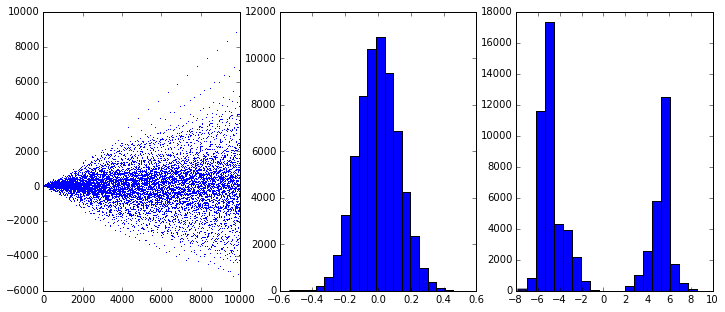

In [2]:
fig, axs = plt.subplots(1,3, figsize=(12,5))
L1dW = np.loadtxt("Convergence.dat");
axs[0].plot(L1dW,',')
Wout = np.loadtxt("W.dat")
print Wout.shape
W = Wout[1024:]
Winit = Wout[:1024]
axs[1].hist(Winit.flat, bins=20)
axs[2].hist(W.flat, bins=20)
print W.mean(), W.std()
print W.max(), W.min()

8.565467 -7.812911


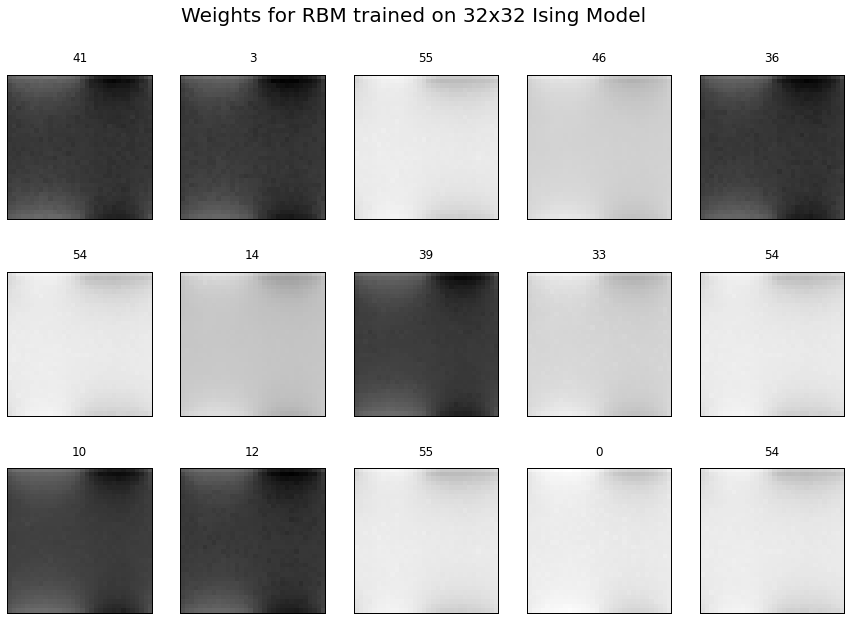

In [4]:
fig, axs = plt.subplots(3,5, figsize=(15,10))
selection = np.random.randint(0,high=W.shape[1], size=3*5)
mx, mn = W.max(), W.min()
print mx, mn
for ax, s in zip(axs.flat, selection):
    ax.matshow(W[:,s].reshape(32,32), cmap="Greys", vmin=mn, vmax=mx)
    ax.set_title(str(s))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.suptitle('Weights for RBM trained on 32x32 Ising Model', fontsize=20)
#plt.colorbar()

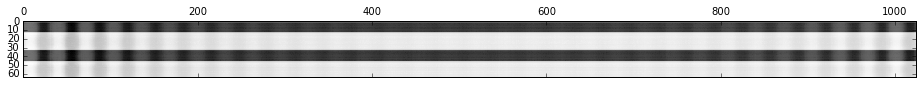

In [5]:
plt.matshow(W.T, cmap='Greys')